In [22]:
import pandas as pd
import matplotlib.pyplot as plt

reddit_df = pd.read_csv("datasets/reddit_cleaned.csv")

# Normalize event column to avoid string mismatches
reddit_df['event_clean'] = reddit_df['event'].str.lower().str.strip()

# Filter valid entries with non-null score
reddit_df = reddit_df.dropna(subset=['score', 'upvote_ratio'])

# Filter World Cup and Olympics posts/comments
wc_posts = reddit_df[reddit_df['event_clean'] == 'world cup']
ol_posts = reddit_df[reddit_df['event_clean'] == 'olympics']

print("World Cup entries:", len(wc_posts))
print("Olympics entries:", len(ol_posts))


World Cup entries: 49822
Olympics entries: 49825


In [64]:
top_wc = wc_posts.sort_values(by='score', ascending=False).head(5)
top_ol = ol_posts.sort_values(by='score', ascending=False).head(5)

print("Top 5 World Cup Entries")
print(top_wc[['clean_text', 'score', 'upvote_ratio']])

print("\nTop 5 Olympics Entries")
print(top_ol[['clean_text', 'score', 'upvote_ratio']])


Top 5 World Cup Entries
                                              clean_text   score  upvote_ratio
25242               russia banned winter olympics doping  139847          0.92
18130  iran national football team stood mournfully r...   87483          0.91
16883  iran national football team refusing sing nati...   76571          0.90
19933   poland refuse play russia world cup playoff game   75178          0.95
1549   bbc ignores world cup opening ceremony favour ...   69342          0.93

Top 5 Olympics Entries
                                              clean_text  score  upvote_ratio
77002        chopstick got tokyo olympics never happened  91843          0.93
72285  taiwan badminton player exhausted beating chin...  87110          0.94
74992  tokyo olympic one greatest moment happened top...  82636          0.91
76282  tunisian teenager ahmed hafnaouis family watch...  78791          0.92
51279  usa country obsessed gun far medal shooting ol...  76735          0.65


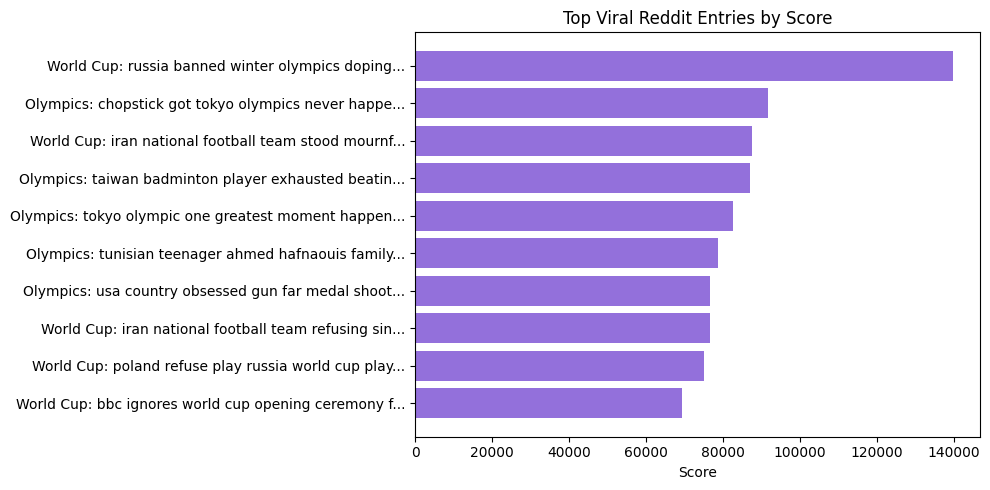

In [42]:
# Concatenate and label
top_combined = pd.concat([top_wc, top_ol])
top_combined['label'] = top_combined['event_clean'].str.title() + ": " + top_combined['clean_text'].str.slice(0, 40) + "..."

# Sort by score (descending)
top_combined = top_combined.sort_values(by='score', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_combined['label'], top_combined['score'], color='mediumpurple')
plt.title('Top Viral Reddit Entries by Score')
plt.xlabel('Score')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


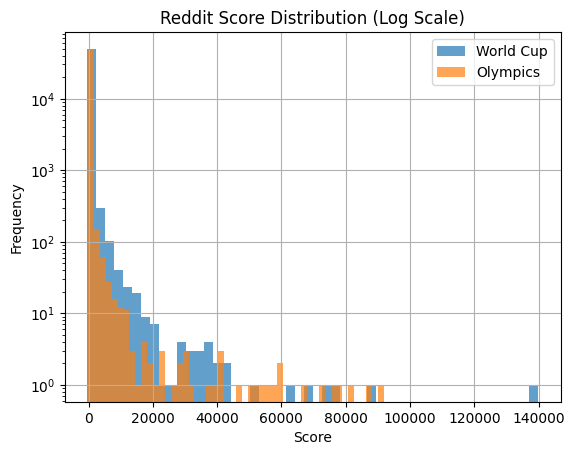

In [32]:
plt.hist(wc_posts['score'], bins=50, alpha=0.7, label='World Cup', log=True)
plt.hist(ol_posts['score'], bins=50, alpha=0.7, label='Olympics', log=True)
plt.title('Reddit Score Distribution (Log Scale)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


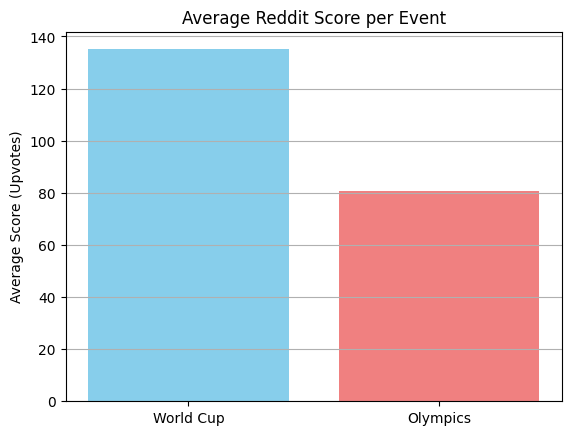

In [40]:
import numpy as np

# Compute means
avg_wc = wc_posts['score'].mean()
avg_ol = ol_posts['score'].mean()

plt.bar(['World Cup', 'Olympics'], [avg_wc, avg_ol], color=['skyblue', 'lightcoral'])
plt.title('Average Reddit Score per Event')
plt.ylabel('Average Score (Upvotes)')
plt.grid(axis='y')
plt.show()


In [120]:
# Count number of top-level comments 
top_level_comments = reddit_df[reddit_df['parent_id'].str.startswith('t3_')]
comment_counts = top_level_comments['parent_id'].value_counts().rename_axis('post_id').reset_index(name='comment_count')

# Strip 't3_' to get raw post IDs
comment_counts['id'] = comment_counts['post_id'].str.replace('t3_', '', regex=False)

# Filter only actual posts 
post_df = reddit_df[reddit_df['id'].isin(comment_counts['id'])][['id', 'clean_text', 'score', 'event']].drop_duplicates(subset='id')

# Merge comment counts with post info
merged = post_df.merge(comment_counts, on='id')

# Show most commented posts
most_commented = merged.sort_values(by='comment_count', ascending=False).head(5)
print(most_commented[['event', 'clean_text', 'score', 'comment_count']])


         event                                         clean_text  score  \
252   Olympics         paris olympics closing ceremony megathread   4991   
363   Olympics                  tokyo opening ceremony megathread   4897   
28   World Cup    match thread qatar ecuador fifa world cup group   1590   
168  World Cup     match thread spain russia fifa world cup round   2188   
269   Olympics  paris olympics closing ceremony megathread par...   1781   

     comment_count  
252           2075  
363           2058  
28            1931  
168           1356  
269           1332  


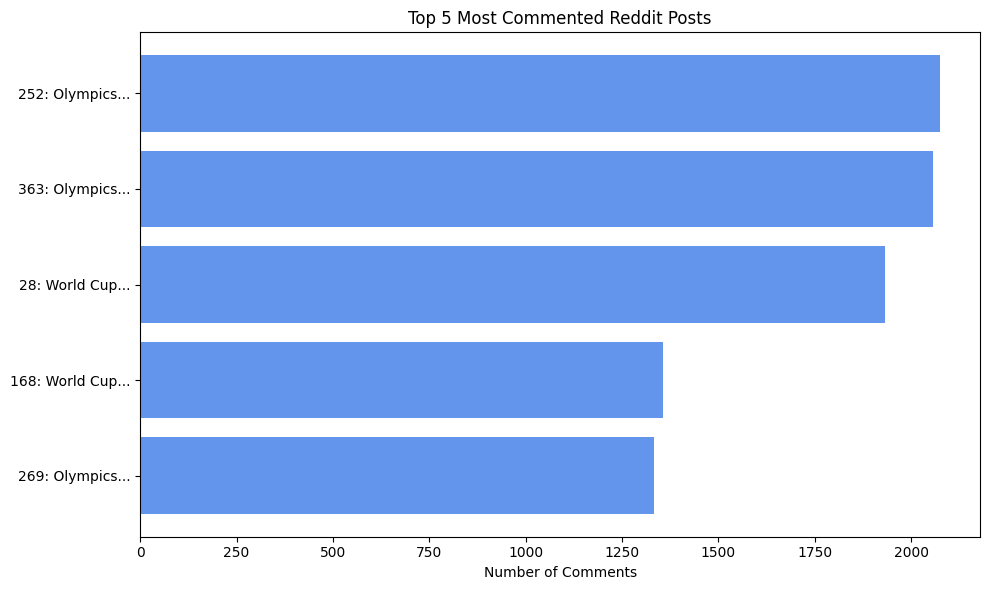

In [132]:
# Generate a short preview for context
most_commented['preview'] = most_commented['event'].str.slice(0, 40) + "..."

# Combine index with preview to make label unique
most_commented['label'] = most_commented.index.astype(str) + ": " + most_commented['preview']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(most_commented['label'], most_commented['comment_count'], color='cornflowerblue')
plt.xlabel('Number of Comments')
plt.title('Top 5 Most Commented Reddit Posts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
